In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np
import pydeck as pdk
import streamlit as st
import plotly.express as px

In [2]:
path = os.getcwd()
file1 = os.listdir()[3]
file2 = os.listdir()[5]
print(file1,file2)

Seed collections.xlsx Transplanting sessions.xlsx


In [3]:
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

In [4]:
df1 = df1.dropna(how='all')[:-1]
df1['Year'] = df1['Year'].astype(int).astype(str)
df1['Month'] = df1['Month'].astype(int).astype(str)
df1['date']= (df1['Year']).apply(lambda x:datetime.strptime(x,'%Y'))

In [5]:
df1

,Year,Month,Day,Family,Genus,Species,Malagasy_name,Country,Region,Commune,Location,Latitude,Longitude,Elevation(m),Habitat_type,QuantityOfSeeds (Kg),NumberOfSeeds,date
0,2020,12,17.0,Euphorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Akopa,NaN,NaN,NaN,secondary forest,21.0,NaN,2020-01-01
1,2020,12,28.0,Euphorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Akopa,-21.25374,NaN,NaN,secondary forest,22.0,NaN,2020-01-01
2,2020,11,24.0,eupbhorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Akopa,NaN,NaN,NaN,secondary forest,25.0,NaN,2020-01-01
3,2020,11,25.0,Euphorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Akopa,NaN,NaN,NaN,secondary forest,27.0,NaN,2020-01-01
4,2020,11,26.0,Euphorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Akopa,NaN,NaN,NaN,secondary forest,23.0,NaN,2020-01-01
5,2019,2,NaN,Burseracea,Canarium,madagascariensis,Ramy,NaN,NaN,NaN,Ambodikimba,NaN,NaN,NaN,secondary forest,NaN,240.0,2019-01-01
6,2018,12,18.0,Anarcadiaceae,Abrahamia,ditimena,Sandramy,NaN,NaN,NaN,Ambodiriana,NaN,NaN,NaN,secondary forest,1.5,750.0,2018-01-01
7,2018,12,18.0,Euphorbiaceae,Bridelia,tulasneana,Harina,NaN,NaN,NaN,Ambodiriana,-21.25595,47.43328,755.0,secondary forest,0.3,NaN,2018-01-01
8,2019,3,NaN,NaN,NaN,NaN,Voabe,NaN,NaN,NaN,Ambodiriana,NaN,NaN,NaN,secondary forest,NaN,200.0,2019-01-01
9,2019,11,5.0,Euphorbiaceae,Bridelia,tulasneana,harina,NaN,NaN,NaN,Ambodiriana,NaN,NaN,NaN,secondary forest,16.5,NaN,2019-01-01


<AxesSubplot:title={'center':'Quantity of Seeds Collected Each Year'}, ylabel='QuantityOfSeeds (Kg)'>

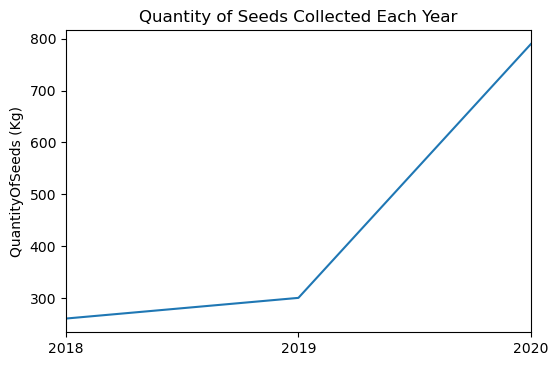

In [11]:
fig = plt.figure(dpi=100)
df1.groupby('date').sum()['QuantityOfSeeds (Kg)'][:-1].plot(kind='line',xlabel='',ylabel='QuantityOfSeeds (Kg)',title='Quantity of Seeds Collected Each Year',ax=plt.gca())

<AxesSubplot:title={'center':'The most collected seeds are Racemosa '}, ylabel='Quantity of Seeds (Kg)'>

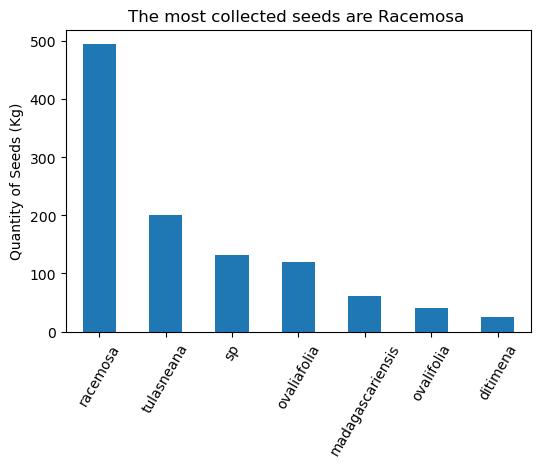

In [16]:
fig = plt.figure(dpi=100)
df1.groupby('Species').sum()['QuantityOfSeeds (Kg)'].sort_values(ascending=False)[:-4].plot(kind='bar',rot=60,ylabel='Quantity of Seeds (Kg)',title='The most collected seeds are Racemosa ',xlabel='',ax = plt.gca())

<AxesSubplot:title={'center':'Most Trees are Transplanted Regularly'}, ylabel=' '>

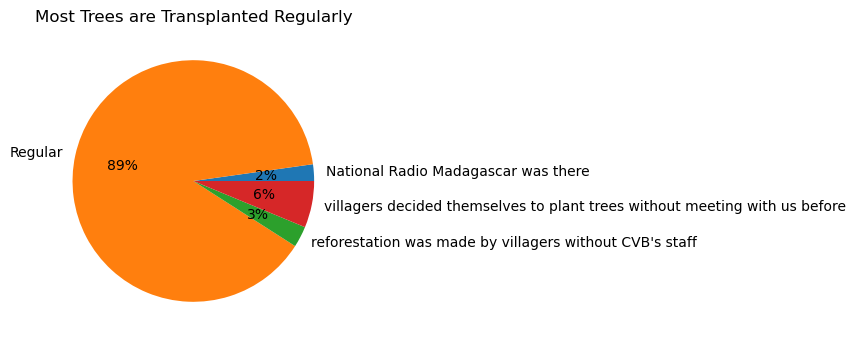

In [8]:
df2 = df2.dropna(how='all',axis=1)
df2['Notes'] = df2['Notes'].fillna('Regular')
fig = plt.figure(dpi=100)
df2.groupby('Notes').sum()['NumberOfTrees'].plot(kind='pie',ylabel=' ',title='Most Trees are Transplanted Regularly',autopct="%1.0f%%",ax=plt.gca())

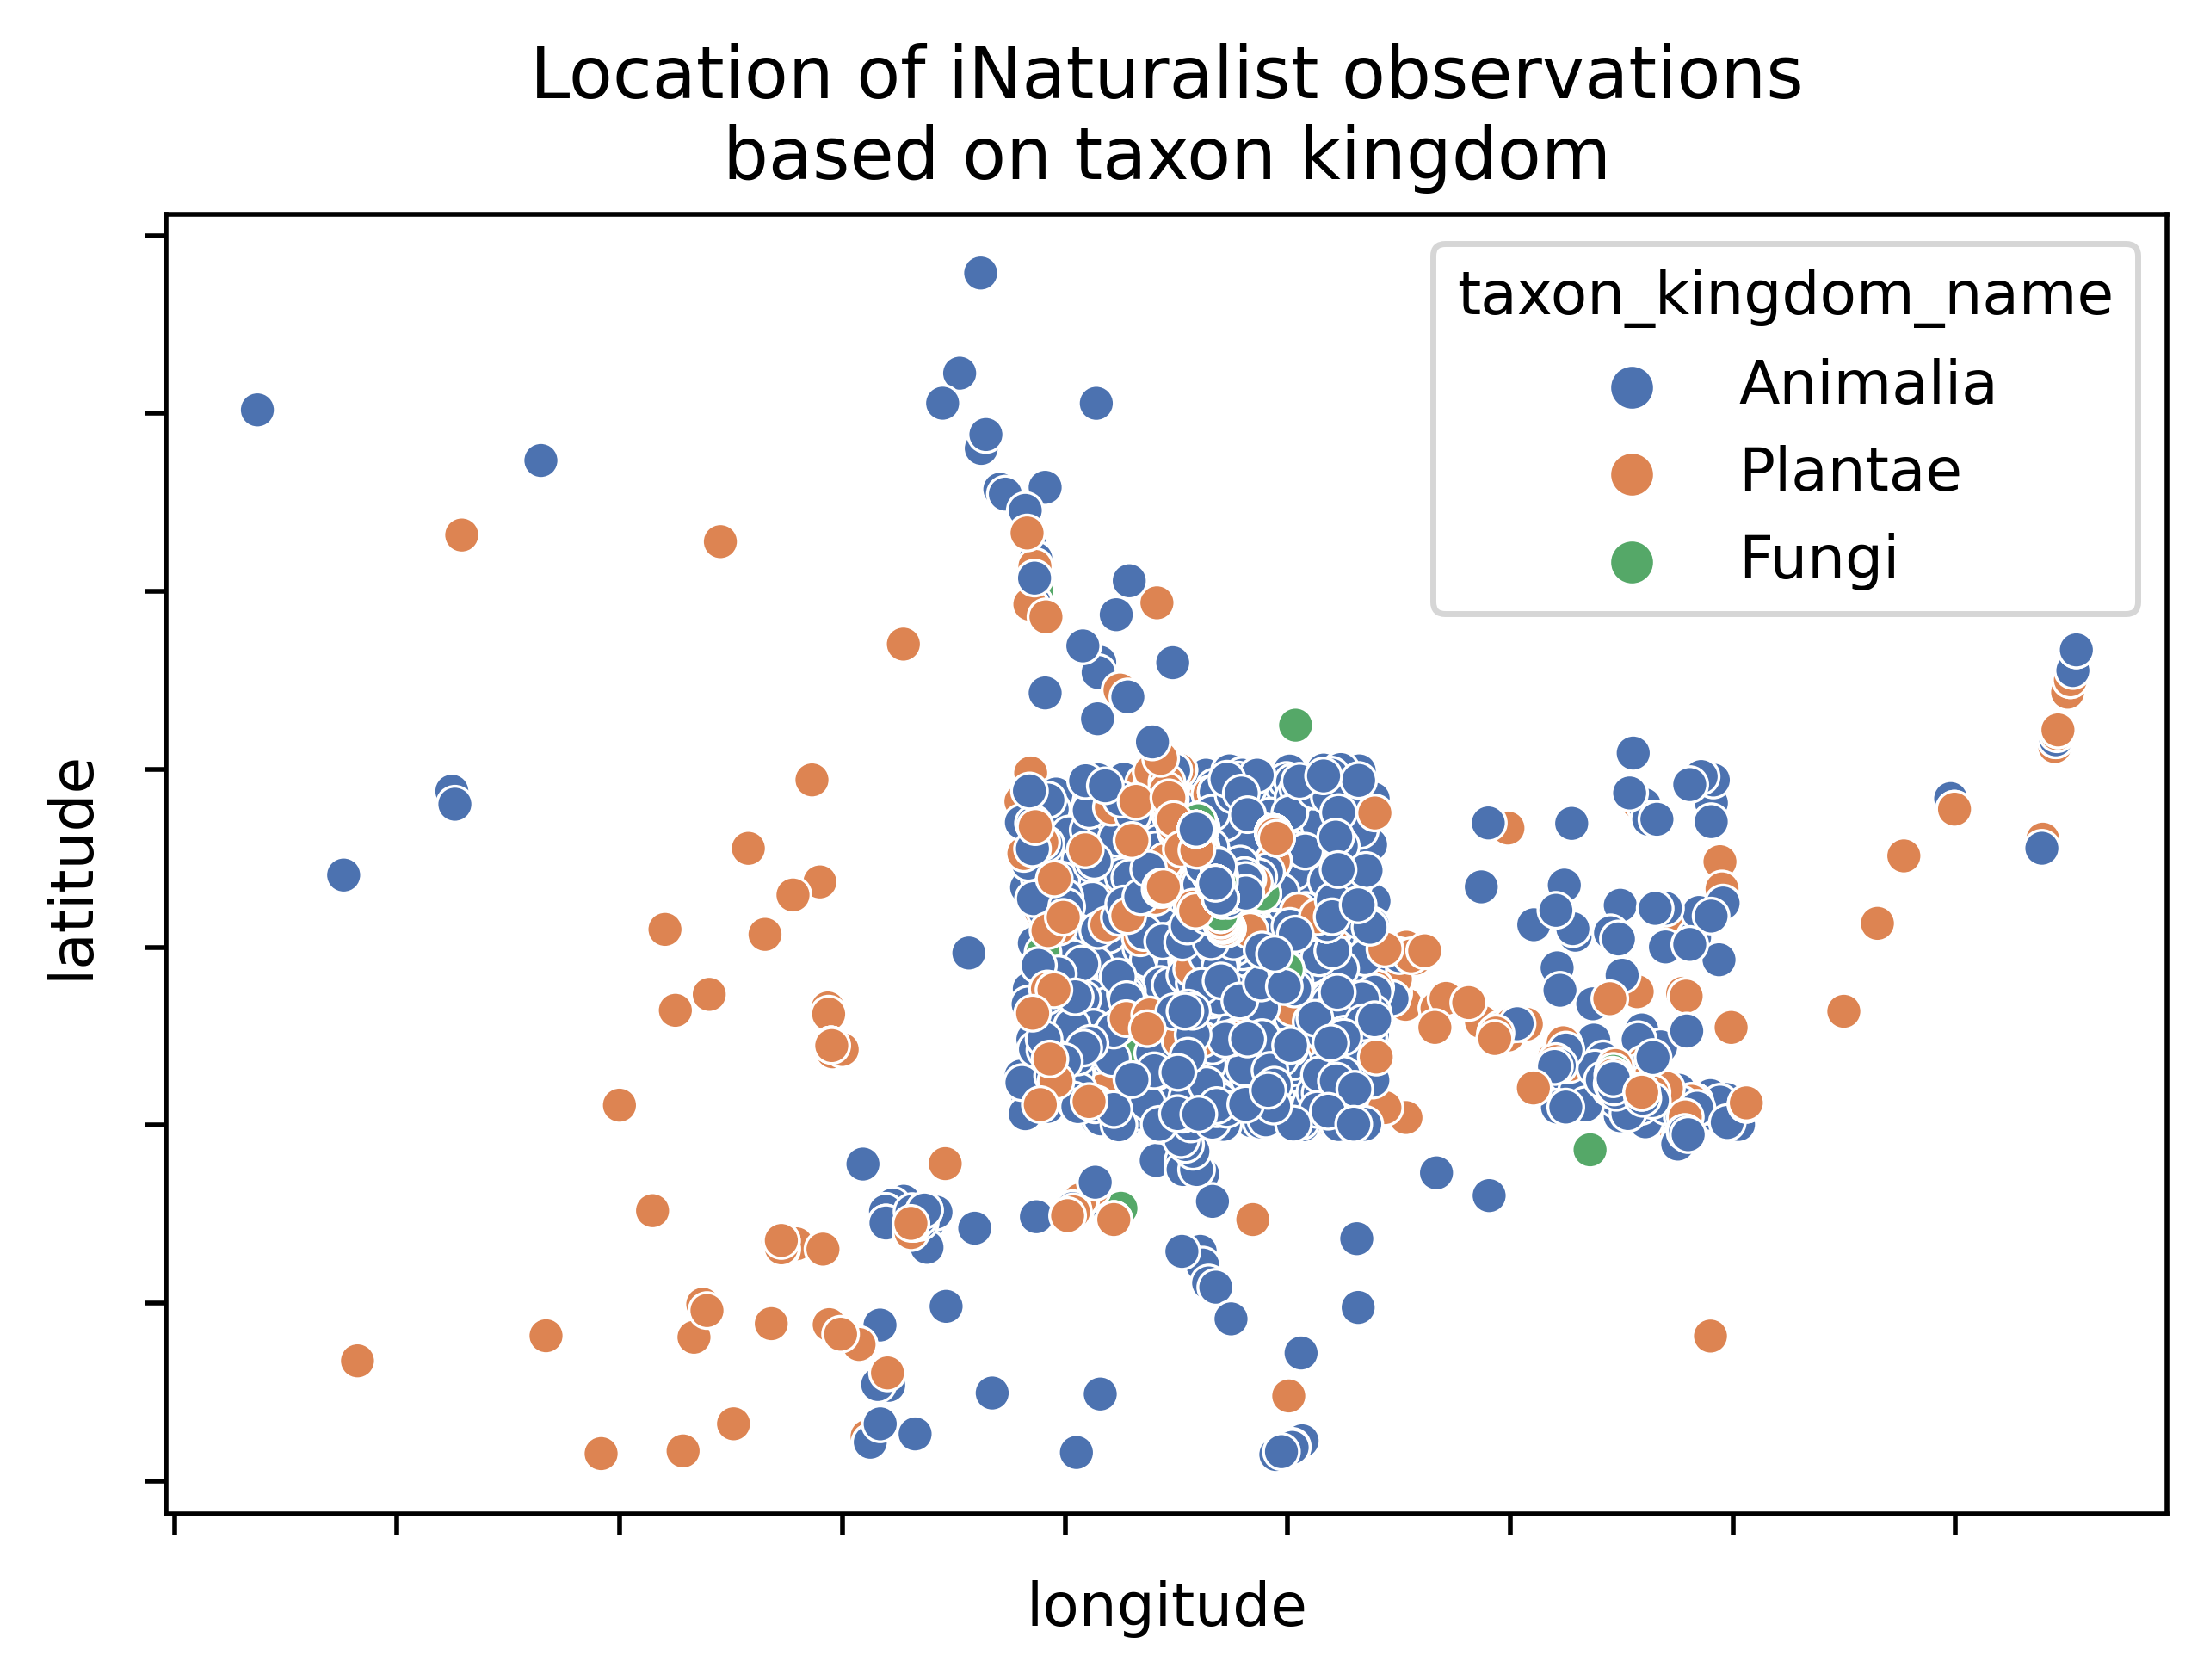

In [3]:
import seaborn as sns
naturalist_data = pd.read_csv("iNaturalist - observations-131984.csv")
df1 = naturalist_data.drop(naturalist_data[naturalist_data['taxon_kingdom_name'] == 'Protozoa'].index)
fig = plt.figure(dpi=500)
g1 = sns.scatterplot(x='longitude', y='latitude', data=df1, hue='taxon_kingdom_name', palette="deep")
g1.set(xticklabels=[],yticklabels=[])
plt.title('Location of iNaturalist observations\n'+ 'based on taxon kingdom')
plt.show()

In [41]:
naturalist_data = pd.read_csv("iNaturalist - observations-131984.csv")
df1 = naturalist_data.drop(naturalist_data[naturalist_data['taxon_kingdom_name'] == 'Protozoa'].index)
df1['taxon_kingdom_name'][pd.isnull(df1['taxon_kingdom_name'])] = 'Other'
color_dict = {'Animalia':(1,0,0),'Fungi':(0,1,0),'Plantae':(0,0,1),'Other':(1,1,0)}
df1['color'] = [color_dict[i] for i in df1['taxon_kingdom_name']]
df1

<ipython-input-41-ac469f76a533>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['taxon_kingdom_name'][pd.isnull(df1['taxon_kingdom_name'])] = 'Other'


,id,observed_on,user_id,quality_grade,url,image_url,description,place_guess,latitude,longitude,...,common_name,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,color
0,13008,2008-12-15,909,research,http://www.inaturalist.org/observations/13008,https://static.inaturalist.org/photos/25481/me...,I think this is a sportive lemur,"Fianarantsoa, MG",-21.336633,47.257394,...,Small-toothed Sportive Lemur,Animalia,Chordata,Mammalia,Primates,Lepilemuridae,Lepilemur,Lepilemur microdon,NaN,"(1, 0, 0)"
1,13009,2008-12-15,909,needs_id,http://www.inaturalist.org/observations/13009,https://static.inaturalist.org/photos/25482/me...,NaN,ranomafana national park madagascar,-21.369166,47.391071,...,Large-jawed Spiders,Animalia,Arthropoda,Arachnida,Araneae,Araneidae,NaN,NaN,NaN,"(1, 0, 0)"
2,13010,2008-12-15,909,research,http://www.inaturalist.org/observations/13010,https://static.inaturalist.org/photos/25502/me...,NaN,ranomafana national park madagascar,-21.369166,47.391071,...,Giraffe Weevil,Animalia,Arthropoda,Insecta,Coleoptera,Attelabidae,Trachelophorus,Trachelophorus giraffa,NaN,"(1, 0, 0)"
3,13013,NaN,909,casual,http://www.inaturalist.org/observations/13013,https://static.inaturalist.org/photos/25525/me...,NaN,ranomafana national park madagascar,-21.367879,47.390240,...,Madagascar Leaf-tailed Geckos,Animalia,Chordata,Reptilia,Squamata,Gekkonidae,Uroplatus,NaN,NaN,"(1, 0, 0)"
4,19732,2010-03-16,1606,research,http://www.inaturalist.org/observations/19732,https://static.inaturalist.org/photos/35501/me...,NaN,"Vatovavy Fitovinany, MG-FI, MG",-21.315806,47.596886,...,Madagascan Mantella,Animalia,Chordata,Amphibia,Anura,Mantellidae,Mantella,Mantella madagascariensis,NaN,"(1, 0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,69362965,2021-01-17,3413015,needs_id,https://www.inaturalist.org/observations/69362965,https://static.inaturalist.org/photos/11251899...,NaN,Talatakely,-21.272392,47.424639,...,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Precis,Precis eurodoce,NaN,"(1, 0, 0)"
7841,69362966,2021-01-17,3413015,research,https://www.inaturalist.org/observations/69362966,https://static.inaturalist.org/photos/11251899...,NaN,Talatakely,-21.272392,47.424639,...,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Erebidae,Chiromachla,Chiromachla insulare,NaN,"(1, 0, 0)"
7842,69362967,2021-01-17,3413015,needs_id,https://www.inaturalist.org/observations/69362967,https://static.inaturalist.org/photos/11251900...,NaN,Talatakely,-21.272392,47.424639,...,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Heteropsis,Heteropsis pauper,NaN,"(1, 0, 0)"
7843,69410636,2017-11-28,34850,research,https://www.inaturalist.org/observations/69410636,https://static.inaturalist.org/photos/11224670...,NaN,"Ifanadiana, Madagascar",-21.238769,47.487453,...,Purple yam,Plantae,Tracheophyta,Liliopsida,Dioscoreales,Dioscoreaceae,Dioscorea,Dioscorea alata,NaN,"(0, 0, 1)"


In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

In [16]:
naturalist_data = pd.read_csv("iNaturalist - observations-131984.csv")
naturalist_data['taxon_kingdom_name'][pd.isnull(naturalist_data['taxon_kingdom_name'])] = 'Other'

fig = px.scatter_mapbox(naturalist_data, lat='latitude', lon='longitude', hover_name="taxon_kingdom_name",
                       zoom=7,color='taxon_kingdom_name')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":5,"t":5,"l":5,"b":5})
fig.update_traces(marker_size=3)

<ipython-input-16-c872c3ead280>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
import plotly.express as px

fig = px.scatter_mapbox(naturalist_data, lat='latitude', lon='longitude', hover_name="taxon_kingdom_name",
                       zoom=11,color='taxon_kingdom_name')
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":5,"t":5,"l":5,"b":5})
fig.update_traces(marker_size=4)

In [18]:
fig = px.scatter_mapbox(naturalist_data, lat='latitude', lon='longitude', hover_name="taxon_kingdom_name",
                       zoom=7,color='taxon_kingdom_name')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":5,"t":5,"l":5,"b":5})
fig.update_traces(marker_size=3)

In [6]:
donor = pd.read_excel(r'./donor/demo donor data for U of R.xlsx')

donor['label']="Others'"
donor['label'][donor['Donor']=='Sami Leal']='Your tree'


fig = px.scatter_mapbox(donor, lat='Latitude', lon='Longitude', hover_name="Donor",hover_data=['Date planted','Family','Genus','Species'],
                       zoom=17,color = 'label')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":5,"t":5,"l":5,"b":5})


<ipython-input-6-2be19b2e2f00>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2021-04-09 12:06:54.807 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


<AxesSubplot:title={'center':'Most Trees are Transplanted Regularly'}, ylabel=' '>

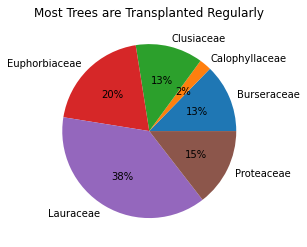

In [14]:
fig = plt.figure()
donor.groupby('Family').count()['Donor'].plot(kind='pie',ylabel=' ',title='Category of tree planted',autopct="%1.0f%%",ax=plt.gca())

In [21]:
donor[donor['Latitude']==47.55254783]

,Donor,Donation amount,Donation code,Asset sponsorship,geolocation,Family,Genus,Species,Malagasy Name,Latitude,Longitude,Date planted,label


In [32]:
trees = pd.read_excel(r'./donor/2019 treesurvey data.xlsx')
fig = px.scatter_mapbox(trees, lat='Latitude1', lon='Longitude1', hover_name="Status",
                       zoom=10,color = 'Status')
fig.update_layout(mapbox_style="open-street-map")

In [29]:
trees

,Year,Month,Day,Time_start,Time_end,NurseryID,Site_name,pH,Light,Moist,...,Surface_metersquare,Track_name,GPS_device,Orientation,Vegetation,Bush_cover%,Bush_height_cm,Vegetation_Nearby,Animal_species,Notes
0,2019,3,4,08:13:00,09:17:00,Mandrivany,Ankeba,7.5,NaN,2.5,...,560.82,ANKEBAMANDRIVANY,Yellow,NaN,"Apanga, Goavy kely, Dingana, Lantana camara",100.0,101.3,NaN,Hypsipetes,100 no nambolena
1,2019,3,4,08:13:00,09:17:00,Mandrivany,Ankeba,7.5,NaN,2.5,...,560.82,ANKEBAMANDRIVANY,Yellow,NaN,"Apanga, Goavy kely, Dingana, Lantana camara",100.0,101.3,NaN,Hypsipetes,NaN
2,2019,3,4,08:13:00,09:17:00,Mandrivany,Ankeba,7.5,NaN,2.5,...,560.82,ANKEBAMANDRIVANY,Yellow,NaN,"Apanga, Goavy kely, Dingana, Lantana camara",100.0,101.3,NaN,Hypsipetes,NaN
3,2019,3,4,08:13:00,09:17:00,Mandrivany,Ankeba,7.5,NaN,2.5,...,560.82,ANKEBAMANDRIVANY,Yellow,NaN,"Apanga, Goavy kely, Dingana, Lantana camara",100.0,101.3,NaN,Hypsipetes,NaN
4,2019,3,4,08:13:00,09:17:00,Mandrivany,Ankeba,7.5,NaN,2.5,...,560.82,ANKEBAMANDRIVANY,Yellow,NaN,"Apanga, Goavy kely, Dingana, Lantana camara",100.0,101.3,NaN,Hypsipetes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2019,3,2,14:04:00,NaN,Ambodivoangy,Sambirano,7.5,400.0,2.5,...,3347.58,Sambirano,Yellow,NaN,NaN,NaN,NaN,NaN,"Coua blue, Sarothrura insularis, Tsipoy, Akanga",NaN
2249,2019,1,24,09:00:00,11:45:00,UCN,Ankevohevo,7.5,NaN,2.5,...,1840.25,ANKEVOHEVO2ND,Yellow,NaN,NaN,NaN,NaN,NaN,None,NaN
2250,2019,3,2,14:04:00,NaN,Ambodivoangy,Sambirano,7.5,400.0,2.1,...,3347.58,Sambirano,Yellow,NaN,NaN,NaN,NaN,NaN,"Coua blue, Sarothrura insularis, Tsipoy, Akanga",NaN
2251,2019,1,30,NaN,NaN,UCN,Ankevohevo Eric,7.8,NaN,2.5,...,389.52,Erick Tracks,Yellow,NaN,NaN,NaN,NaN,NaN,None,NaN


In [31]:
trees = trees[pd.isnull(trees['Latitude1'])==False][pd.isnull(trees['Longitude1'])==False]

<ipython-input-31-f848fe090b7c>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
trees['Latitude1'].unique()

array([-21.23853,       nan, -21.21692, -21.23577, -21.24529, -21.28128,
       -21.25291, -21.26141, -21.25991, -21.25843, -21.25073, -21.25994,
       -21.26788, -21.27441, -21.29448])